In [20]:
#資料處理
dataPath=r'iris_org.csv'
dataList=[]
import csv
with open(dataPath, "r", newline="") as csvData:
  reader = csv.reader(csvData)
  for r in reader:
     dataList.append(r)
featrueName=[]#特徵屬性名稱
featrueData=[]#特徵屬性Data
ClassData=[]#ClassData
for r in range(0,len(dataList)):
  if(r==0):
    featrueName=dataList[r]
  else:
    data=[]
    ClassData.append(dataList[r][len(dataList[r])-1])
    for c in range(0,len(dataList[r])):
      if(c<len(dataList[r])-1):
        data.append(float(dataList[r][c]))
    featrueData.append(data)

In [21]:
#Purity計算
def Purity(Cluster,ClassData):
    cSet=[]
    for c in range(0,len(Cluster)):
        isNotSave=True
        for cs in range(0,len(cSet)):
            if(cSet[cs]==Cluster[c]):
                isNotSave=False
                break
        if(isNotSave):
            cSet.append(Cluster[c])
    classSet=[]
    for a in range(0,len(ClassData)):
        isNotSave=True
        for cs in range(0,len(classSet)):
            if(classSet[cs]==ClassData[a]):
                isNotSave=False
                break
        if(isNotSave):
            classSet.append(ClassData[a])
    cCount=[]
    for cs in range(0,len(cSet)):
        classCount=[]
        for c in range (0,len(classSet)):
            classCount.append(0)
        for cl in range(0,len(Cluster)):
            if(cSet[cs]==Cluster[cl]):
                for c in range (0,len(classSet)):
                    if(ClassData[cl]==classSet[c]):
                        classCount[c]+=1
                        break;
        cCount.append(classCount)
    rowCount=[]
    maxCount=[]
    for c in range(0,len(cCount)):
        rowCount.append(0)
        maxCount.append(0)
    sumCount=0
    for c in range(0,len(cCount)):
        for r in range(0,len(cCount[c])):
            rowCount[c]+=cCount[c][r]
            sumCount+=cCount[c][r]
            if(maxCount[c]<cCount[c][r]):
                maxCount[c]=cCount[c][r]
    
    avg=0
    for a in range(0,len(rowCount)):
        avg+=(maxCount[a]/rowCount[a])*(rowCount[a]/sumCount)
    return avg

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.cluster.hierarchy import dendrogram

In [23]:
def Plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

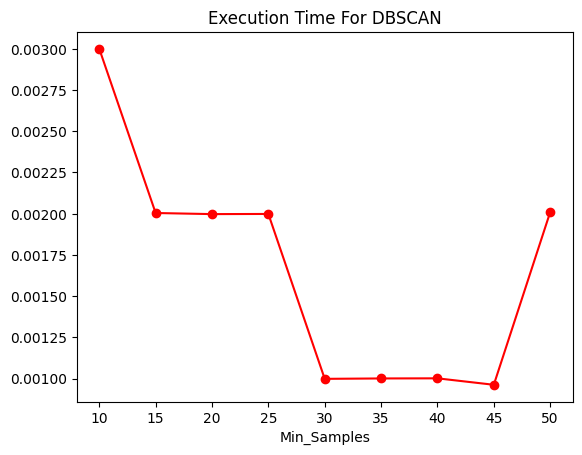

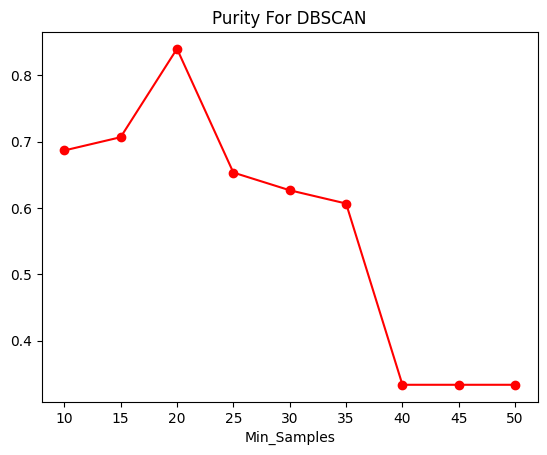

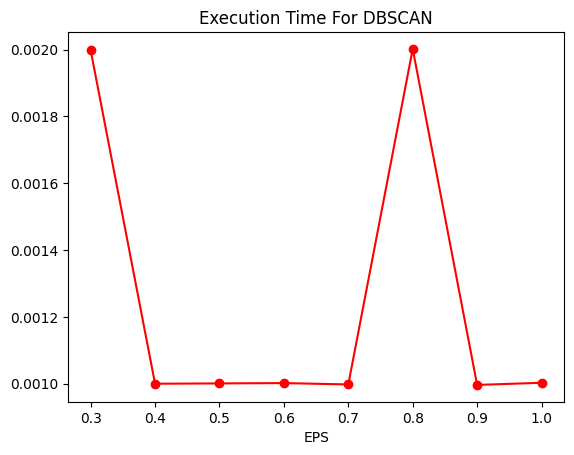

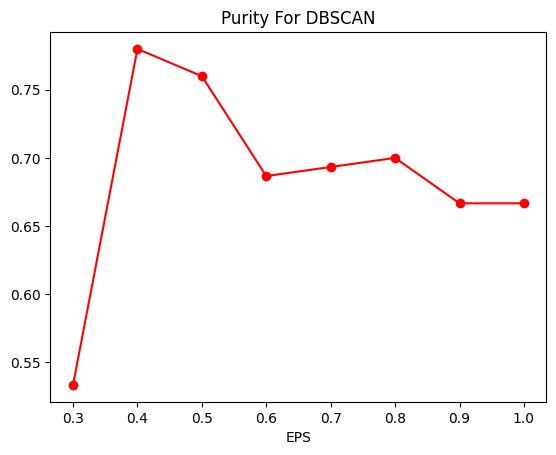

In [24]:
#DB Scan
from sklearn.cluster import DBSCAN
X=np.array(featrueData)
dbscanTime=[]
dbscanPurity=[]
epsArray=[]
for e in range(2,11):
    epsArray.append(e*5)
    timeStart=time.time()
    db_scan=DBSCAN(eps=0.6,min_samples=(e*5)).fit(X)
    timeFinish=time.time()
    dbscan_predict=db_scan.labels_
    dbscanTime.append((timeFinish-timeStart))
    dbscanPurity.append(Purity(dbscan_predict,ClassData))
plt.plot(epsArray,dbscanTime,'o-',color = 'red')
plt.title("Execution Time For DBSCAN")
plt.xlabel("Min_Samples")
plt.show()
plt.plot(epsArray,dbscanPurity,'o-',color = 'red')
plt.title("Purity For DBSCAN")
plt.xlabel("Min_Samples")
plt.show()
dbscanTime.clear()
dbscanPurity.clear()
epsArray.clear()
for e in range(3,11):
    epsArray.append(e*0.1)
    timeStart=time.time()
    db_scan=DBSCAN(eps=(e*0.1),min_samples=10).fit(X)
    timeFinish=time.time()
    dbscan_predict=db_scan.labels_
    dbscanTime.append((timeFinish-timeStart))
    dbscanPurity.append(Purity(dbscan_predict,ClassData))
plt.plot(epsArray,dbscanTime,'o-',color = 'red')
plt.title("Execution Time For DBSCAN")
plt.xlabel("EPS")
plt.show()
plt.plot(epsArray,dbscanPurity,'o-',color = 'red')
plt.title("Purity For DBSCAN")
plt.xlabel("EPS")
plt.show()

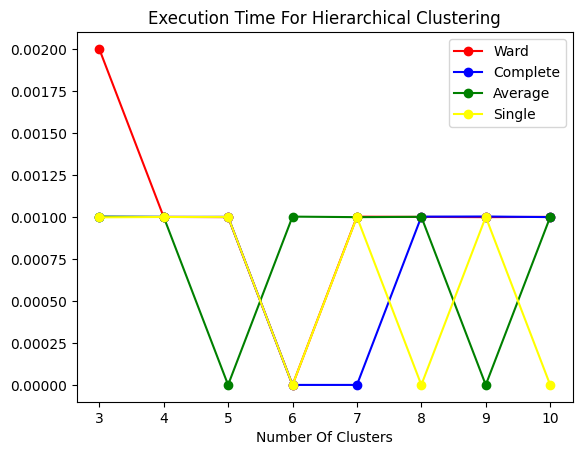

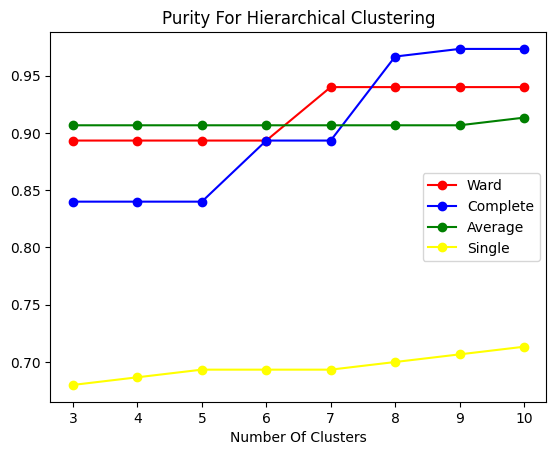

In [25]:
#層次聚類
from sklearn.cluster import AgglomerativeClustering
X=np.array(featrueData)
wardTime=[]
wardPurity=[]
completeTime=[]
completePurity=[]
averageTime=[]
averagePurity=[]
singleTime=[]
singlePurity=[]
xAxis=[]
for nCluster in range(3,11):
    xAxis.append(nCluster)
    ward=AgglomerativeClustering(n_clusters=nCluster,affinity='euclidean',linkage='ward')
    complete=AgglomerativeClustering(n_clusters=nCluster,affinity='euclidean',linkage='complete')
    average=AgglomerativeClustering(n_clusters=nCluster,affinity='euclidean',linkage='average')
    single=AgglomerativeClustering(n_clusters=nCluster,affinity='euclidean',linkage='single')
    wardStart=time.time()
    ward.fit_predict(X)
    wardFinish=time.time()
    wardTime.append((wardFinish - wardStart))
    wardPurity.append(Purity(ward.fit_predict(X),ClassData))
    completeStart=time.time()
    complete.fit_predict(X)
    completeFinish=time.time()
    completeTime.append((completeFinish - completeStart))
    completePurity.append(Purity(complete.fit_predict(X),ClassData))
    averageStart=time.time()
    average.fit_predict(X)
    averageFinish=time.time()
    averageTime.append((averageFinish - averageStart))
    averagePurity.append(Purity(average.fit_predict(X),ClassData))
    singleStart=time.time()
    single.fit_predict(X)
    singleFinish=time.time()
    singleTime.append((singleFinish - singleStart))
    singlePurity.append(Purity(single.fit_predict(X),ClassData))
plt.plot(xAxis,wardTime,'o-',color = 'red', label="Ward")
plt.plot(xAxis,completeTime,'o-',color = 'blue', label="Complete")
plt.plot(xAxis,averageTime,'o-',color = 'green', label="Average")
plt.plot(xAxis,singleTime,'o-',color = 'yellow', label="Single")
plt.title("Execution Time For Hierarchical Clustering")
plt.xlabel("Number Of Clusters")
plt.legend(loc = "best")
plt.show()
plt.plot(xAxis,wardPurity,'o-',color = 'red', label="Ward")
plt.plot(xAxis,completePurity,'o-',color = 'blue', label="Complete")
plt.plot(xAxis,averagePurity,'o-',color = 'green', label="Average")
plt.plot(xAxis,singlePurity,'o-',color = 'yellow', label="Single")
plt.title("Purity For Hierarchical Clustering")
plt.xlabel("Number Of Clusters")
plt.legend(loc = "best")
plt.show()

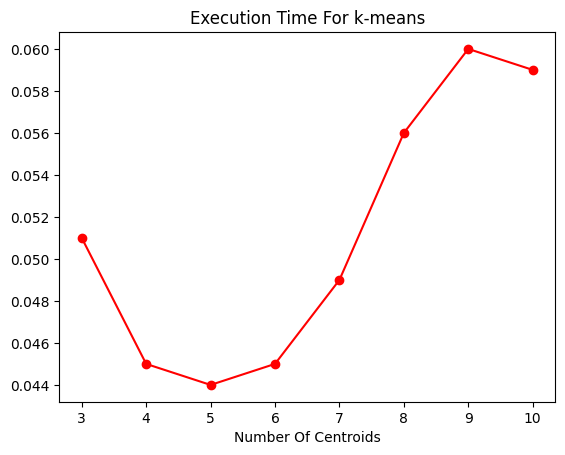

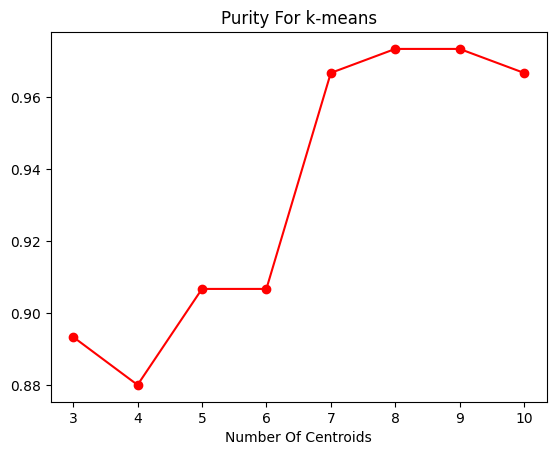

In [26]:
#k-means
from sklearn.cluster import KMeans
X=np.array(featrueData)
execTime=[]
purityArray=[]
centroids=[]
for n in range(3,11):
    centroids.append(n)
    kmeans=KMeans(n_clusters=n)
    timeStart=time.time()
    kmeans.fit(X)
    timeFinish=time.time()
    km_predict=kmeans.predict(X)
    execTime.append((timeFinish-timeStart))
    purityArray.append(Purity(km_predict,ClassData))
plt.plot(centroids,execTime,'o-',color = 'red')
plt.title("Execution Time For k-means")
plt.xlabel("Number Of Centroids")
plt.show()
plt.plot(centroids,purityArray,'o-',color = 'red')
plt.title("Purity For k-means")
plt.xlabel("Number Of Centroids")
plt.show()

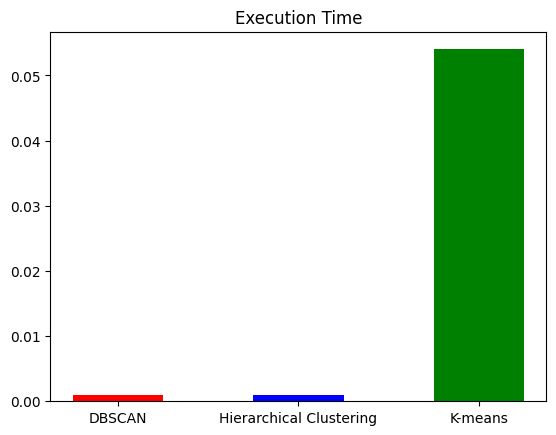

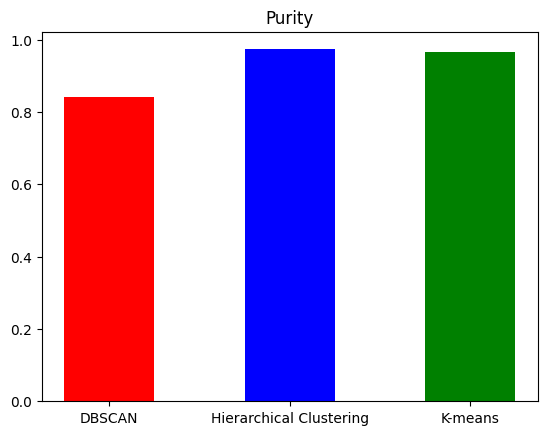

DBSCAN Execution Time:0.001000
DBSCAN Purity:0.84
Hierarchical Clustering Execution Time:0.001000
Hierarchical Clustering Purity:0.9733333333333334
K-means Execution Time:0.054000
K-means Purity:0.9666666666666667


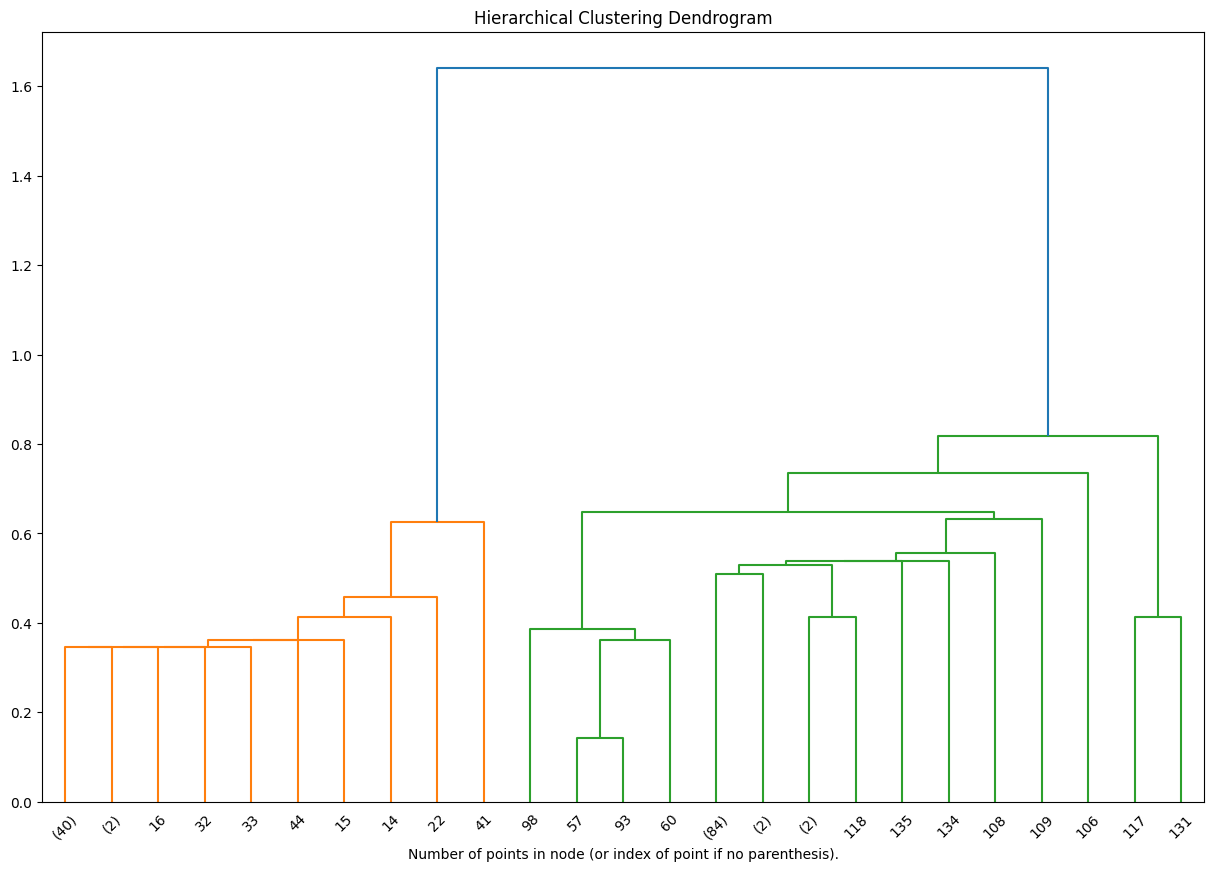

In [27]:
#演算法比較
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
X=np.array(featrueData)
dbscan=DBSCAN(eps=0.6,min_samples=20)
single=AgglomerativeClustering(n_clusters=10,affinity='euclidean',linkage='complete')
kmeans=KMeans(n_clusters=7)
dbscanStart=time.time()
dbscan.fit(X)
dbscanFinish=time.time()
singleStart=time.time()
single.fit_predict(X)
singleFinish=time.time()
kmeansStart=time.time()
kmeans.fit(X)
kmeansFinish=time.time()
singlePurity=Purity(single.fit_predict(X),ClassData)
kmeansPurity=Purity(kmeans.fit_predict(X),ClassData)
dbscanPurity=Purity(dbscan.fit_predict(X),ClassData)
xArray=[1,2,3]
hArray=[(dbscanFinish-dbscanStart),(singleFinish-singleStart),(kmeansFinish-kmeansStart)]
pArray=[dbscanPurity,singlePurity,kmeansPurity]
cArray=['r','b','g']
lArray=['DBSCAN','Hierarchical Clustering','K-means']
plt.bar(xArray,hArray,color=cArray,tick_label=lArray,width=0.5)
plt.title("Execution Time")
plt.show()
plt.bar(xArray,pArray,color=cArray,tick_label=lArray,width=0.5)
plt.title("Purity")
plt.show()
for x in range(0,len(xArray)):
    print(lArray[x]+" Execution Time:%f"%hArray[x])
    print(lArray[x]+" Purity:"+str(pArray[x]))
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage='single')
model = model.fit(X)
plt.figure(figsize=(15,10),dpi=100,linewidth = 2)
plt.title('Hierarchical Clustering Dendrogram')
Plot_dendrogram(model, truncate_mode='level', p=9)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()